In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
from sklearn.preprocessing import MinMaxScaler

c:\ProgramData\Anaconda3\envs\geo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
embedders = ["BERT", "DOCTOVEC", "SPACY", "TFIDF"]

df_test_table = pd.read_csv("./data/test_table.csv")

split_func = lambda x: x.split('_')[1]
replace_rf = lambda x: x.replace('RANDOM FOREST', 'RF')
replace_ab = lambda x: x.replace('ADA BOOST', 'AB')
replace_lr = lambda x: x.replace('LINEAR REGRESSION', 'LR')
replace_dt = lambda x: x.replace('DECISION TREE', 'DT')

SyntaxError: invalid syntax (Temp/ipykernel_3868/894803479.py, line 9)

In [7]:
emb = embedders[0]

/tmp/ipykernel_28021/2885939223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['embed_and_model_name'] = df_plot['embed_and_model_name'].apply(split_func).apply(replace_rf).apply(replace_ab).apply(replace_lr).apply(replace_dt)
/tmp/ipykernel_28021/2885939223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Modelos'] = df_plot['embed_and_model_name']
/tmp/ipykernel_28021/2885939223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

[(0.0, 1.0)]

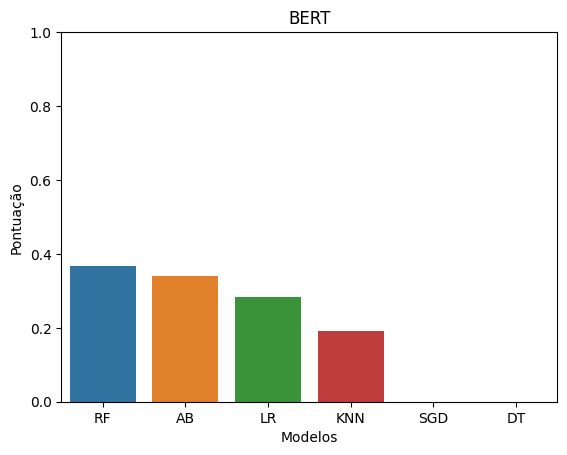

In [8]:
df_plot = df_test_table[df_test_table['embed_and_model_name'].str.contains(emb)]

df_plot['embed_and_model_name'] = df_plot['embed_and_model_name'].apply(split_func).apply(replace_rf).apply(replace_ab).apply(replace_lr).apply(replace_dt)

df_plot['Modelos'] = df_plot['embed_and_model_name']
df_plot['Pontuação'] = df_plot['score']

scaler=MinMaxScaler()
aux=scaler.fit_transform(df_plot['Pontuação'].values.reshape(-1,1))
ax=sns.barplot(data=df_plot,x="Modelos",y='Pontuação')
# ax.set(title=emb)
ax.set(ylim=(0,1.0)) 